<a href="https://colab.research.google.com/github/sidpatondikar/Regression-Project/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Transport Demand Prediction

## Author : Siddharth Patondikar

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Regression Project/train_revised.csv')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 51645 rows and 10 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.duplicated().value_counts()

False    51645
dtype: int64

In [ ]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In the above data:
1. There are no duplicate rows
2. There are no null values

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


## Data Wrangling

In [ ]:
df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49


In [ ]:
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temp_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


Dropping unnecessary columns

In [ ]:
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(51645, 6)

In [ ]:
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 6)

In [ ]:
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [ ]:
df['travel_date'] = pd.to_datetime(df['travel_date'])
df['travel_time'] = pd.to_datetime(df['travel_time'])

## Visualizations

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Distribution of tickets')

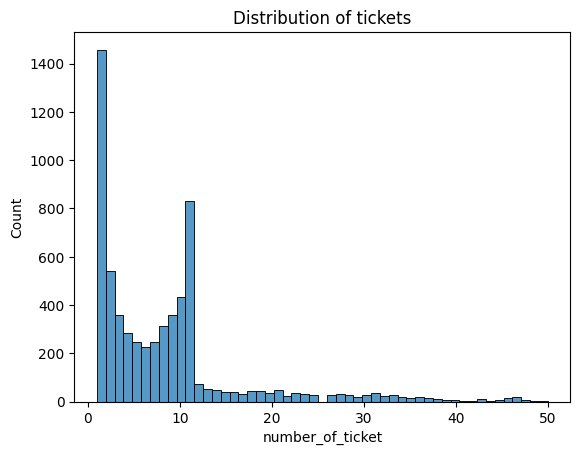

In [ ]:
sns.histplot(df['number_of_ticket'])
plt.title("Distribution of tickets")

Text(0.5, 1.0, 'Types of cars')

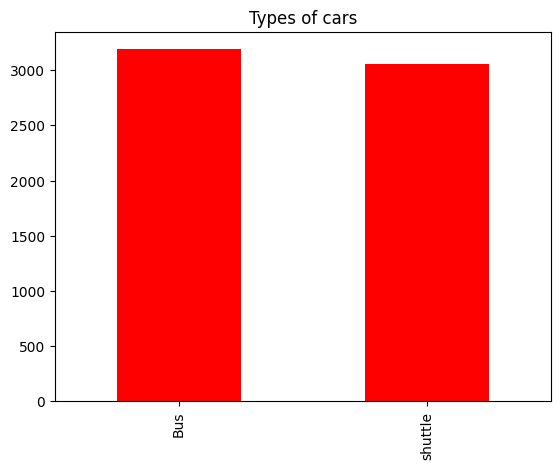

In [ ]:
df['car_type'].value_counts().plot(kind='bar',color='red')
plt.title("Types of cars")

Text(0.5, 1.0, 'Max Capacities')

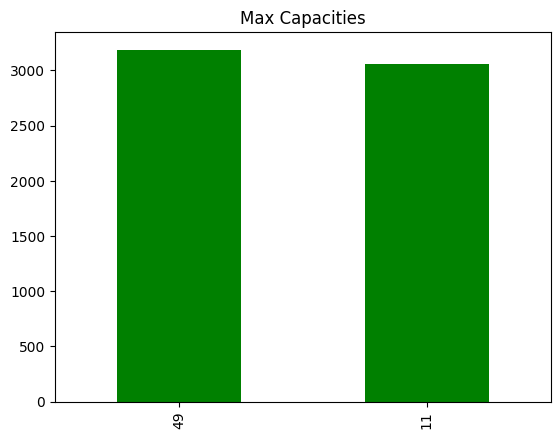

In [ ]:
df['max_capacity'].value_counts().plot(kind='bar',color='green')
plt.title("Max Capacities")

Text(0.5, 1.0, 'Total tickets from each origin place')

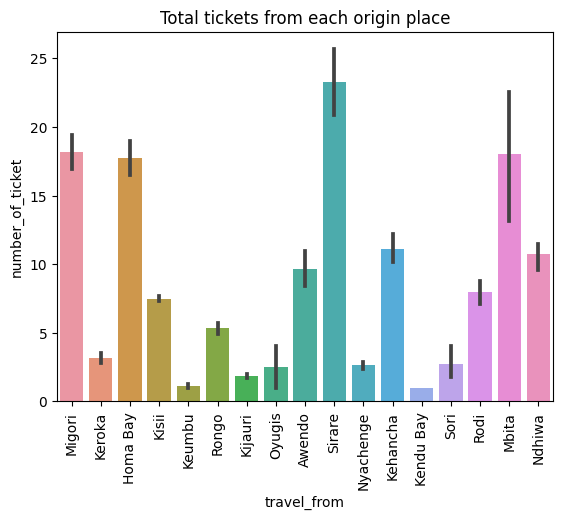

In [ ]:
sns.barplot(data=df,x='travel_from',y='number_of_ticket')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')

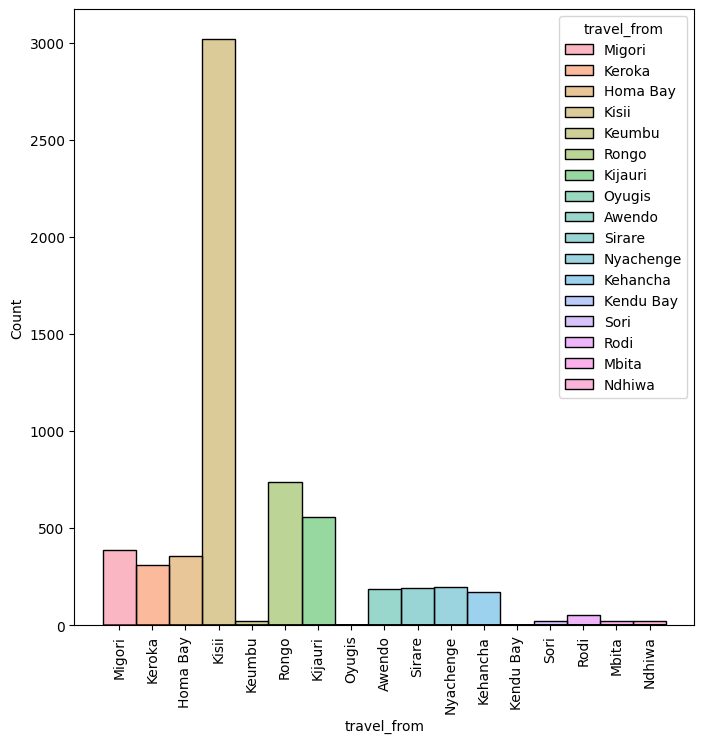

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='travel_from',hue='travel_from')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,2017-10-17,2023-07-10 07:15:00,Migori,Bus,49,1


In [ ]:
df_copy['travel_day'] = df_copy['travel_date'].dt.day
df_copy['travel_month'] = df_copy['travel_date'].dt.month
df_copy['travel_year'] = df_copy['travel_date'].dt.year
df_copy['travel_day_of_week'] = df_copy['travel_date'].dt.dayofweek
df_copy['travel_hour'] = df_copy['travel_time'].dt.hour
df_copy['quarter'] = df_copy['travel_date'].dt.quarter
df_copy['is_weekend'] = df_copy['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

In [ ]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,travel_day,travel_month,travel_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1442,2017-10-17,2023-07-10 07:15:00,Migori,Bus,49,1,17,10,2017,1,7,4,0
1,5437,2017-11-19,2023-07-10 07:12:00,Migori,Bus,49,1,19,11,2017,6,7,4,1
2,5710,2017-11-26,2023-07-10 07:05:00,Keroka,Bus,49,1,26,11,2017,6,7,4,1
3,5777,2017-11-27,2023-07-10 07:10:00,Homa Bay,Bus,49,5,27,11,2017,0,7,4,0
4,5778,2017-11-27,2023-07-10 07:12:00,Migori,Bus,49,31,27,11,2017,0,7,4,0


<Axes: xlabel='travel_day_of_week', ylabel='Count'>

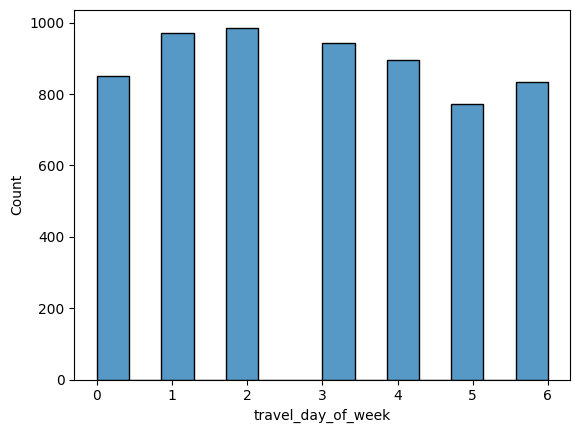

In [ ]:
sns.histplot(df_copy['travel_day_of_week'])

<Axes: xlabel='travel_day', ylabel='Count'>

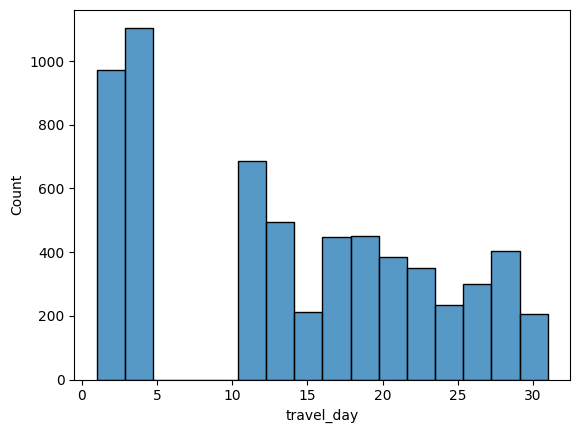

In [ ]:
sns.histplot(df_copy['travel_day'])

<Axes: xlabel='travel_month', ylabel='Count'>

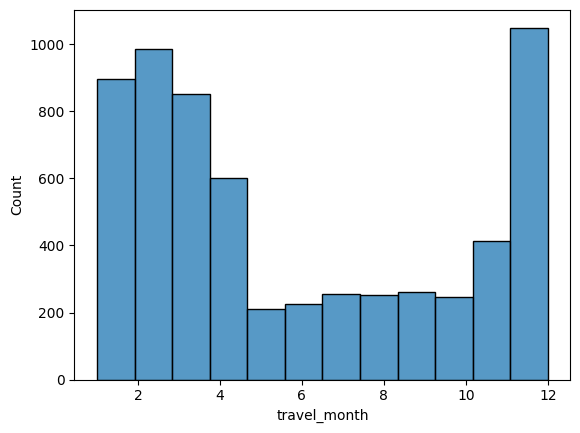

In [ ]:
sns.histplot(df_copy['travel_month'],bins=12)